In [182]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
#The notebook guidance suggested adding the following 3 lines of code, but I do not know what they are and it led to an error.

from sklearn.decomposition import PCA

In [186]:
from sklearn.preprocessing import scale

In [188]:
#Had trouble with the following line of code; will use .to_csv to save my files.
##from library.sb_utils import save_file

In [190]:
#Load and review ski data
ski_data = pd.read_csv('ski_data_cleaned.csv')

In [192]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

In [194]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,1.0,2.0,640.0,60.0,45.0,44.0,350.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,1.0,30.0,30.0,150.0,36.0,69.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,2.0,1.2,800.0,80.0,115.0,49.0,250.0,78.0,104.0,80.0


In [196]:
#Load and review state summary data
state_summary = pd.read_csv('state_summary.csv')

In [198]:
state_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        34 non-null     object 
 1   resorts_per_state            34 non-null     int64  
 2   state_total_skiable_area_ac  34 non-null     float64
 3   state_total_days_open        34 non-null     float64
 4   state_total_terrain_parks    34 non-null     float64
 5   state_total_nightskiing_ac   34 non-null     float64
 6   state_population             34 non-null     int64  
 7   state_area_sq_miles          34 non-null     int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.3+ KB


In [200]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,12,9680.0,1651.0,31.0,237.0,39512223,163695
3,Colorado,14,22232.0,2003.0,40.0,110.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


In [202]:
state_summary_newind = state_summary.set_index('state')

In [204]:
state_summary_newind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, Alaska to Wyoming
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   resorts_per_state            34 non-null     int64  
 1   state_total_skiable_area_ac  34 non-null     float64
 2   state_total_days_open        34 non-null     float64
 3   state_total_terrain_parks    34 non-null     float64
 4   state_total_nightskiing_ac   34 non-null     float64
 5   state_population             34 non-null     int64  
 6   state_area_sq_miles          34 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 2.1+ KB


In [206]:
state_summary_newind.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
state,,,,,,,
Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
California,12,9680.0,1651.0,31.0,237.0,39512223,163695
Colorado,14,22232.0,2003.0,40.0,110.0,5758736,104094
Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


In [208]:
#Seeing the beginning of the list of states from largest to smallest by area
state_summary_newind['state_area_sq_miles'].sort_values(ascending=False).head()

state
Alaska        665384
California    163695
Montana       147040
New Mexico    121590
Arizona       113990
Name: state_area_sq_miles, dtype: int64

In [210]:
#Seeing the beginning of the list of states from largest to smallest by pop
state_summary_newind['state_population'].sort_values(ascending=False).head()

state
California      39512223
New York        19453561
Pennsylvania    12801989
Illinois        12671821
Ohio            11689100
Name: state_population, dtype: int64

In [212]:
#Seeing the beginning of the list of states from most resorts to fewest
state_summary_newind['resorts_per_state'].sort_values(ascending=False).head()

state
New York         33
Michigan         25
Pennsylvania     16
Minnesota        14
New Hampshire    14
Name: resorts_per_state, dtype: int64

In [214]:
#Seeing the beginning of the list of states from most ski area to least
state_summary_newind['state_total_nightskiing_ac'].sort_values(ascending=False).head()

state
New York        2836.0
Michigan        1577.0
Pennsylvania    1343.0
Wisconsin       1025.0
Minnesota       1020.0
Name: state_total_nightskiing_ac, dtype: float64

In [216]:
#Seeing the beginning of the list of states from most days open to least
state_summary_newind['state_total_days_open'].sort_values(ascending=False).head()

state
New York         2384.0
Michigan         2065.0
Colorado         2003.0
California       1651.0
New Hampshire    1591.0
Name: state_total_days_open, dtype: float64

In [218]:
#Adding some useful columns to the state summary DataFrame
state_summary['resorts_per_100kcapita'] = 100_000 * (state_summary['resorts_per_state'] / state_summary['state_population'])
state_summary['resorts_per_100ksq_mile'] = 100_000 * (state_summary['resorts_per_state'] / state_summary['state_area_sq_miles'])
state_summary.drop(columns=['state_population', 'state_area_sq_miles'], inplace=True)
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
2,California,12,9680.0,1651.0,31.0,237.0,0.030370,7.330706
3,Colorado,14,22232.0,2003.0,40.0,110.0,0.243109,13.449382
4,Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


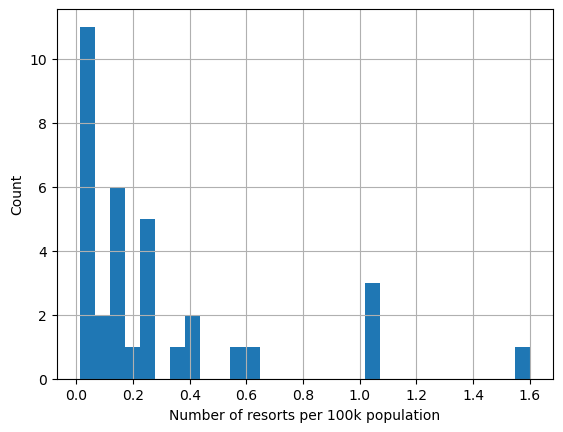

In [220]:
#plotting the resorts per 100kcapita as a histogram
state_summary['resorts_per_100kcapita'].hist(bins=30)
plt.xlabel('Number of resorts per 100k population')
plt.ylabel('Count');

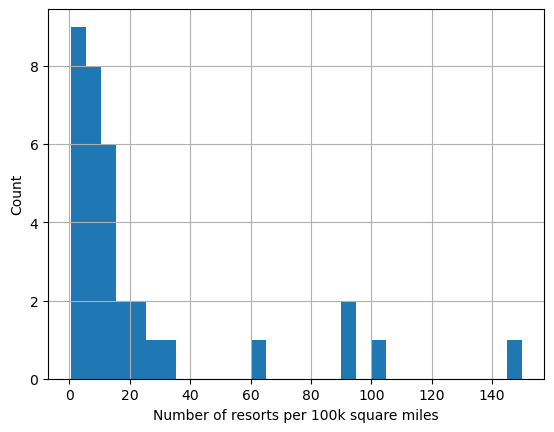

In [222]:
#plotting the resorts per 100 square miles as a histogram
state_summary['resorts_per_100ksq_mile'].hist(bins=30)
plt.xlabel('Number of resorts per 100k square miles')
plt.ylabel('Count');

In [224]:
#Top 5 states for resorts per 100k pop
state_summary.set_index('state')['resorts_per_100kcapita'].sort_values(ascending=False).head()

state
Vermont          1.602592
Wyoming          1.036701
New Hampshire    1.029631
Montana          1.029213
Maine            0.595144
Name: resorts_per_100kcapita, dtype: float64

In [226]:
#Top 5 states for resorts per area unit (100k sq miles)
state_summary.set_index('state')['resorts_per_100ksq_mile'].sort_values(ascending=False).head()

state
New Hampshire    149.748636
Vermont          103.993344
Massachusetts     94.750805
Connecticut       90.203861
New York          60.489414
Name: resorts_per_100ksq_mile, dtype: float64

In [228]:
#Scale the data
##First time with this concept.
#Create a new dataframe, 'state_summary_scale' and set index to 'state'
state_summary_scale = state_summary.set_index('state')

#Save the state labels (using the index attribute of `state_summary_scale`) into the variable 'state_summary_index'
state_summary_index = state_summary_scale.index

#Save the column names (using the `columns` attribute) of `state_summary_scale` into the variable 'state_summary_columns'
state_summary_columns = state_summary_scale.columns
state_summary_scale.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,
Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
California,12,9680.0,1651.0,31.0,237.0,0.030370,7.330706
Colorado,14,22232.0,2003.0,40.0,110.0,0.243109,13.449382
Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


In [230]:
state_summary_scale = scale(state_summary_scale)

In [232]:
#Create a new dataframe from `state_summary_scale` using the column names we saved in `state_summary_columns`
state_summary_scaled_df = pd.DataFrame(state_summary_scale, columns=state_summary_columns)
state_summary_scaled_df.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-0.738791,-0.343658,-0.654096,-0.815492,0.216852,0.327927,-0.666567
1,-0.882328,-0.459319,-0.822174,-0.693348,-0.659837,-0.716504,-0.628674
2,0.553038,0.873825,1.378407,0.833455,-0.384557,-0.708607,-0.466594
3,0.840111,2.938940,1.926218,1.383104,-0.607236,-0.127889,-0.288746
4,-0.451718,-0.659875,-0.641645,-0.449060,-0.351243,-0.408689,1.942238


In [234]:
#Call `state_summary_scaled_df`'s `mean()` method
state_summary_scaled_df.mean()

resorts_per_state              4.408238e-17
state_total_skiable_area_ac    4.367421e-17
state_total_days_open          5.714383e-17
state_total_terrain_parks      6.530724e-17
state_total_nightskiing_ac     2.285753e-17
resorts_per_100kcapita        -3.918434e-17
resorts_per_100ksq_mile       -1.142877e-16
dtype: float64

In [236]:
#Call `state_summary_scaled_df`'s `std()` method
state_summary_scaled_df.std()

resorts_per_state              1.015038
state_total_skiable_area_ac    1.015038
state_total_days_open          1.015038
state_total_terrain_parks      1.015038
state_total_nightskiing_ac     1.015038
resorts_per_100kcapita         1.015038
resorts_per_100ksq_mile        1.015038
dtype: float64

In [238]:
#Repeat the previous call to `std()` but pass in ddof=0 
state_summary_scaled_df.std(ddof=0)

resorts_per_state              1.0
state_total_skiable_area_ac    1.0
state_total_days_open          1.0
state_total_terrain_parks      1.0
state_total_nightskiing_ac     1.0
resorts_per_100kcapita         1.0
resorts_per_100ksq_mile        1.0
dtype: float64

In [240]:
#Fit the PCA transformation using the scaled data
##PCA = Principal Component Analysis -- transforms dataset with many features into a smaller set of uncorrelated variables (principal components)
state_pca = PCA().fit(state_summary_scale)

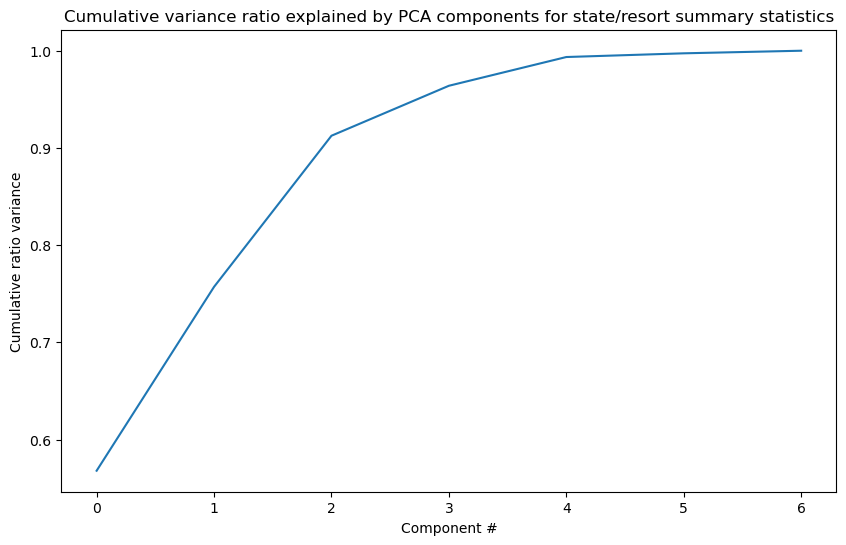

In [242]:
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(state_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

In [244]:
#Call `state_pca`'s `transform()` method, passing in `state_summary_scale` as its argument
state_pca_x = state_pca.transform(state_summary_scale)

In [246]:
state_pca_x.shape

(34, 7)

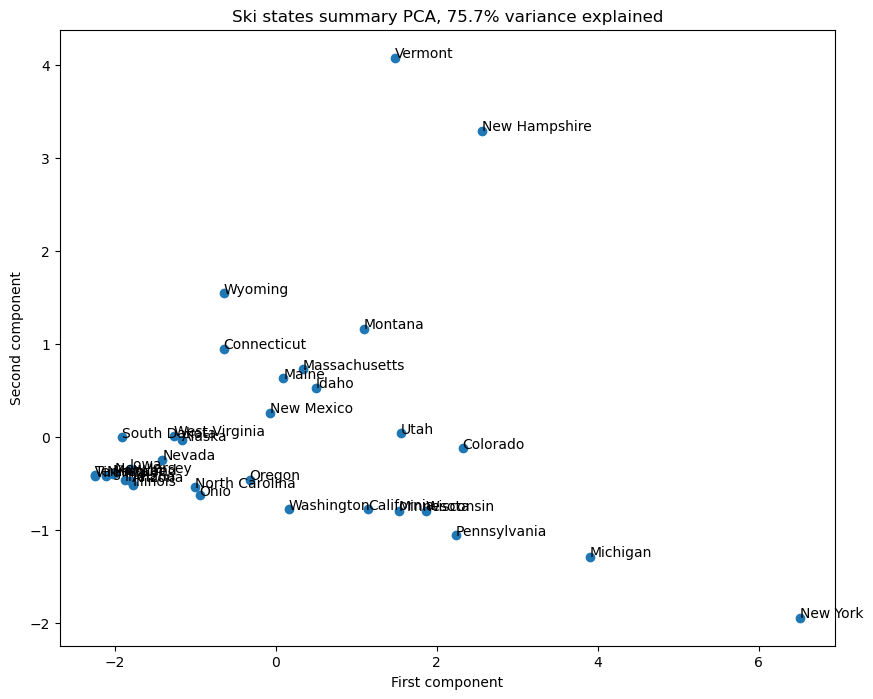

In [248]:
#See the first and second columns from the transformed data (state_pca_x) as x and y coordinates for plotting.
x = state_pca_x[:, 0]
y = state_pca_x[:, 1]
state = state_summary_index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

In [250]:
#Calculate the average 'AdultWeekend' ticket price by state
state_avg_price = ski_data.groupby('state')['AdultWeekend'].mean()
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

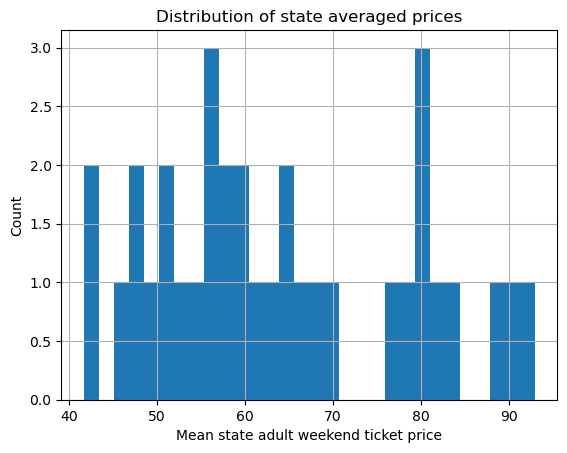

In [252]:
state_avg_price.hist(bins=30)
plt.title('Distribution of state averaged prices')
plt.xlabel('Mean state adult weekend ticket price')
plt.ylabel('Count');

In [254]:
#Create a dataframe containing the values of the first two PCA components
#Remember the first component was given by state_pca_x[:, 0],
#and the second by state_pca_x[:, 1]
#Call these 'PC1' and 'PC2', respectively and set the dataframe index to `state_summary_index`
pca_df = pd.DataFrame({'PC1': state_pca_x[:, 0], 'PC2': state_pca_x[:, 1]}, index=state_summary_index)
pca_df.head()

,PC1,PC2
state,,
Alaska,-1.162532,-0.034715
Arizona,-1.795534,-0.477087
California,1.150201,-0.772194
Colorado,2.320470,-0.118073
Connecticut,-0.650678,0.951484


In [256]:
# our average state prices also have state as an index
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

In [258]:
# we can also cast it to a dataframe using Series' to_frame() method:
state_avg_price.to_frame().head()

,AdultWeekend
state,
Alaska,57.333333
Arizona,83.500000
California,81.416667
Colorado,90.714286
Connecticut,56.800000


In [260]:
#Use pd.concat to concatenate `pca_df` and `state_avg_price` along axis 1
# remember, pd.concat will align on index
pca_df = pd.concat([pca_df, state_avg_price], axis=1)
pca_df.head()

,PC1,PC2,AdultWeekend
state,,,
Alaska,-1.162532,-0.034715,57.333333
Arizona,-1.795534,-0.477087,83.500000
California,1.150201,-0.772194,81.416667
Colorado,2.320470,-0.118073,90.714286
Connecticut,-0.650678,0.951484,56.800000


In [262]:
#Add a 'Quartile' column that calculates 25th/75th
pca_df['Quartile'] = pd.qcut(pca_df['AdultWeekend'], q=4, precision=1)
pca_df.head()

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Alaska,-1.162532,-0.034715,57.333333,"(53.1, 60.4]"
Arizona,-1.795534,-0.477087,83.500000,"(78.4, 93.0]"
California,1.150201,-0.772194,81.416667,"(78.4, 93.0]"
Colorado,2.320470,-0.118073,90.714286,"(78.4, 93.0]"
Connecticut,-0.650678,0.951484,56.800000,"(53.1, 60.4]"


In [ ]:
# Note that Quartile is a new data type: category
# This will affect how we handle it later on
pca_df.dtypes

In [264]:
#Checking for any empty data in rows/columns
pca_df[pca_df.isnull().any(axis=1)]

,PC1,PC2,AdultWeekend,Quartile
state,,,,


In [266]:
#Handling the NaN, with different methods since 'Quartile' is a category type.
#Giving Rhode Island the mean of the rest of the dataset, so that it does not impact any price trend data.
pca_df['AdultWeekend'].fillna(pca_df['AdultWeekend'].mean(), inplace=True)
#Giving Rhode Island 'NA' for its 'Quartile' data.
pca_df['Quartile'] = pca_df['Quartile'].cat.add_categories('NA')
pca_df['Quartile'].fillna('NA', inplace=True)

#Checking the work
pca_df.loc['Rhode Island']

/var/folders/xr/txcrpp2s6f38zfwcw5b624k9q3bnl2/T/ipykernel_1635/3856156798.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pca_df['AdultWeekend'].fillna(pca_df['AdultWeekend'].mean(), inplace=True)
/var/folders/xr/txcrpp2s6f38zfwcw5b624k9q3bnl2/T/ipykernel_1635/3856156798.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

KeyError: 'Rhode Island'

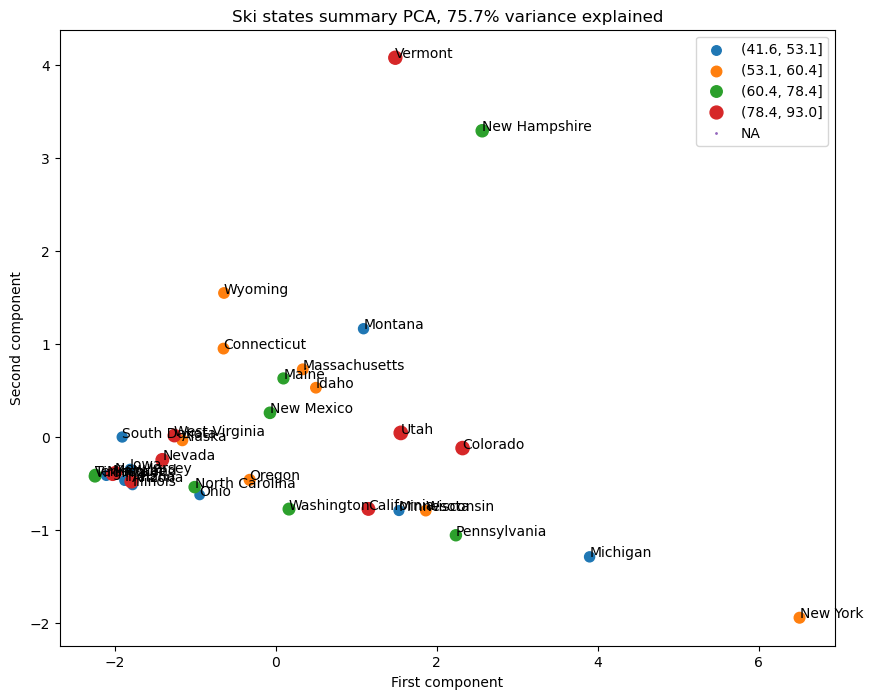

In [268]:
#Replotting the scatter plot of the first 2 components with more detail.
x = pca_df['PC1']
y = pca_df['PC2']
price = pca_df['AdultWeekend']
quartiles = pca_df['Quartile']
state = pca_df.index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=price[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

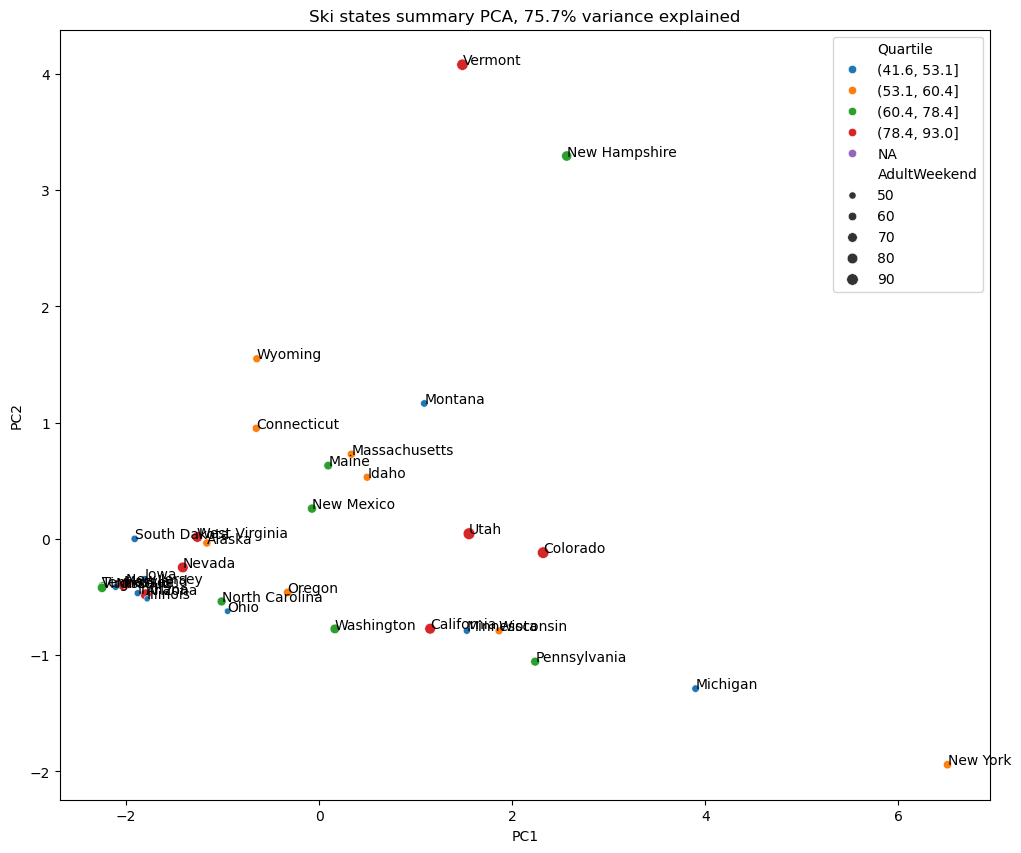

In [270]:
#Create a seaborn scatterplot by calling `sns.scatterplot`
#Specify the dataframe pca_df as the source of the data,
#specify 'PC1' for x and 'PC2' for y,
#specify 'AdultWeekend' for the pointsize (scatterplot's `size` argument),
#specify 'Quartile' for `hue`
#specify pca_df.Quartile.cat.categories for `hue_order` - what happens with/without this?
x = pca_df['PC1']
y = pca_df['PC2']
state = pca_df.index
plt.subplots(figsize=(12, 10))
# Note the argument below to make sure we get the colours in the ascending
# order we intuitively expect!
sns.scatterplot(x='PC1', y='PC2', size='AdultWeekend', hue='Quartile', 
                hue_order=pca_df['Quartile'].cat.categories, data=pca_df)
#and we can still annotate with the state labels
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))   
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained');

In [272]:
pd.DataFrame(state_pca.components_, columns=state_summary_columns)

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,0.492462,0.219416,0.479049,0.486050,0.403816,0.163306,0.232097
1,-0.110878,0.076002,-0.033833,-0.104856,-0.352792,0.739508,0.546312
2,-0.053468,0.817497,0.133446,-0.085152,-0.219806,0.153008,-0.481722
3,0.079163,-0.349176,-0.123073,-0.013830,0.336278,0.633032,-0.585370
4,-0.047963,0.377556,-0.487270,-0.323318,0.664823,0.005964,0.266757
5,-0.109410,0.115322,-0.603301,0.770070,-0.128422,0.015594,-0.031849
6,0.849582,0.002885,-0.367434,-0.218577,-0.304288,-0.045159,-0.028051


In [274]:
#Trying to zoom in on New Hampshire and Vermont and their "outlier" status
state_summary[state_summary['state'].isin(['New Hampshire', 'Vermont'])].transpose()

,17,28
state,New Hampshire,Vermont
resorts_per_state,14,10
state_total_skiable_area_ac,2857.0,4702.0
state_total_days_open,1591.0,1052.0
state_total_terrain_parks,33.0,27.0
state_total_nightskiing_ac,376.0,50.0
resorts_per_100kcapita,1.029631,1.602592
resorts_per_100ksq_mile,149.748636,103.993344


In [ ]:
###What is up with the 'state_total_terrain_parks' data??? That does not seem right at all.
#It is pulling the same data as 'state_total_skiable_area_ac'.

#Fixed it by going back to my Part 2 Notebook and catching a mistake in code that defined 'state_total_terrain_parks'

In [276]:
state_summary_scaled_df[state_summary['state'].isin(['New Hampshire', 'Vermont'])].transpose()

,17,28
resorts_per_state,0.840111,0.265965
state_total_skiable_area_ac,-0.248728,0.054821
state_total_days_open,1.285030,0.446195
state_total_terrain_parks,0.955599,0.589166
state_total_nightskiing_ac,-0.140837,-0.712439
resorts_per_100kcapita,2.019102,3.583133
resorts_per_100ksq_mile,3.672996,2.343050


In [278]:
ski_data.head().transpose()

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [280]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
2,California,12,9680.0,1651.0,31.0,237.0,0.030370,7.330706
3,Colorado,14,22232.0,2003.0,40.0,110.0,0.243109,13.449382
4,Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


In [282]:
# DataFrame's merge method provides SQL-like joins
# here 'state' is a column (not an index)
ski_data = ski_data.merge(state_summary, how='left', on='state')
ski_data.head().transpose()

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [284]:
ski_data['resort_skiable_area_ac_state_ratio'] = ski_data['SkiableTerrain_ac'] / ski_data['state_total_skiable_area_ac']
ski_data['resort_days_open_state_ratio'] = ski_data['daysOpenLastYear'] / ski_data['state_total_days_open']
ski_data['resort_terrain_park_state_ratio'] = ski_data['TerrainParks'] / ski_data['state_total_terrain_parks']
ski_data['resort_night_skiing_state_ratio'] = ski_data['NightSkiing_ac'] / ski_data['state_total_nightskiing_ac']

ski_data.drop(columns=['state_total_skiable_area_ac', 'state_total_days_open', 
                       'state_total_terrain_parks', 'state_total_nightskiing_ac'], inplace=True)

In [288]:
ski_data.head().transpose()

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


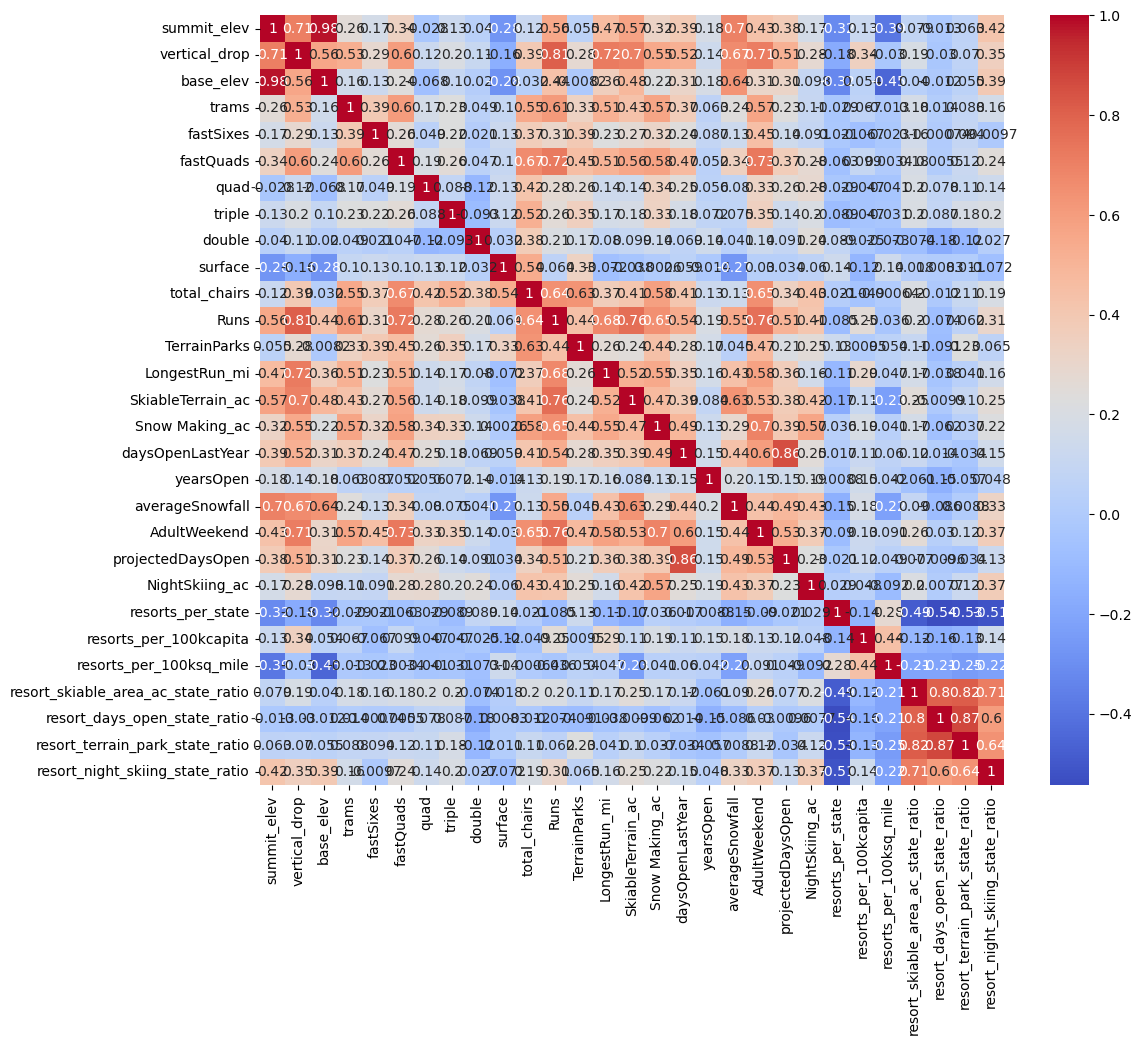

In [296]:
#Show a seaborn heatmap of correlations in ski_data
#Hint: call pandas' `corr()` method on `ski_data` and pass that into `sns.heatmap`
plt.subplots(figsize=(12,10))
sns.heatmap(ski_data.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm");

In [298]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'AdultWeekend', data=ski_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [300]:
#Use a list comprehension to build a list of features from the columns of `ski_data` that
#are _not_ any of 'Name', 'Region', 'state', or 'AdultWeekend'
features = [col for col in ski_data.columns if col not in ['Name', 'Region', 'state', 'AdultWeekend']]

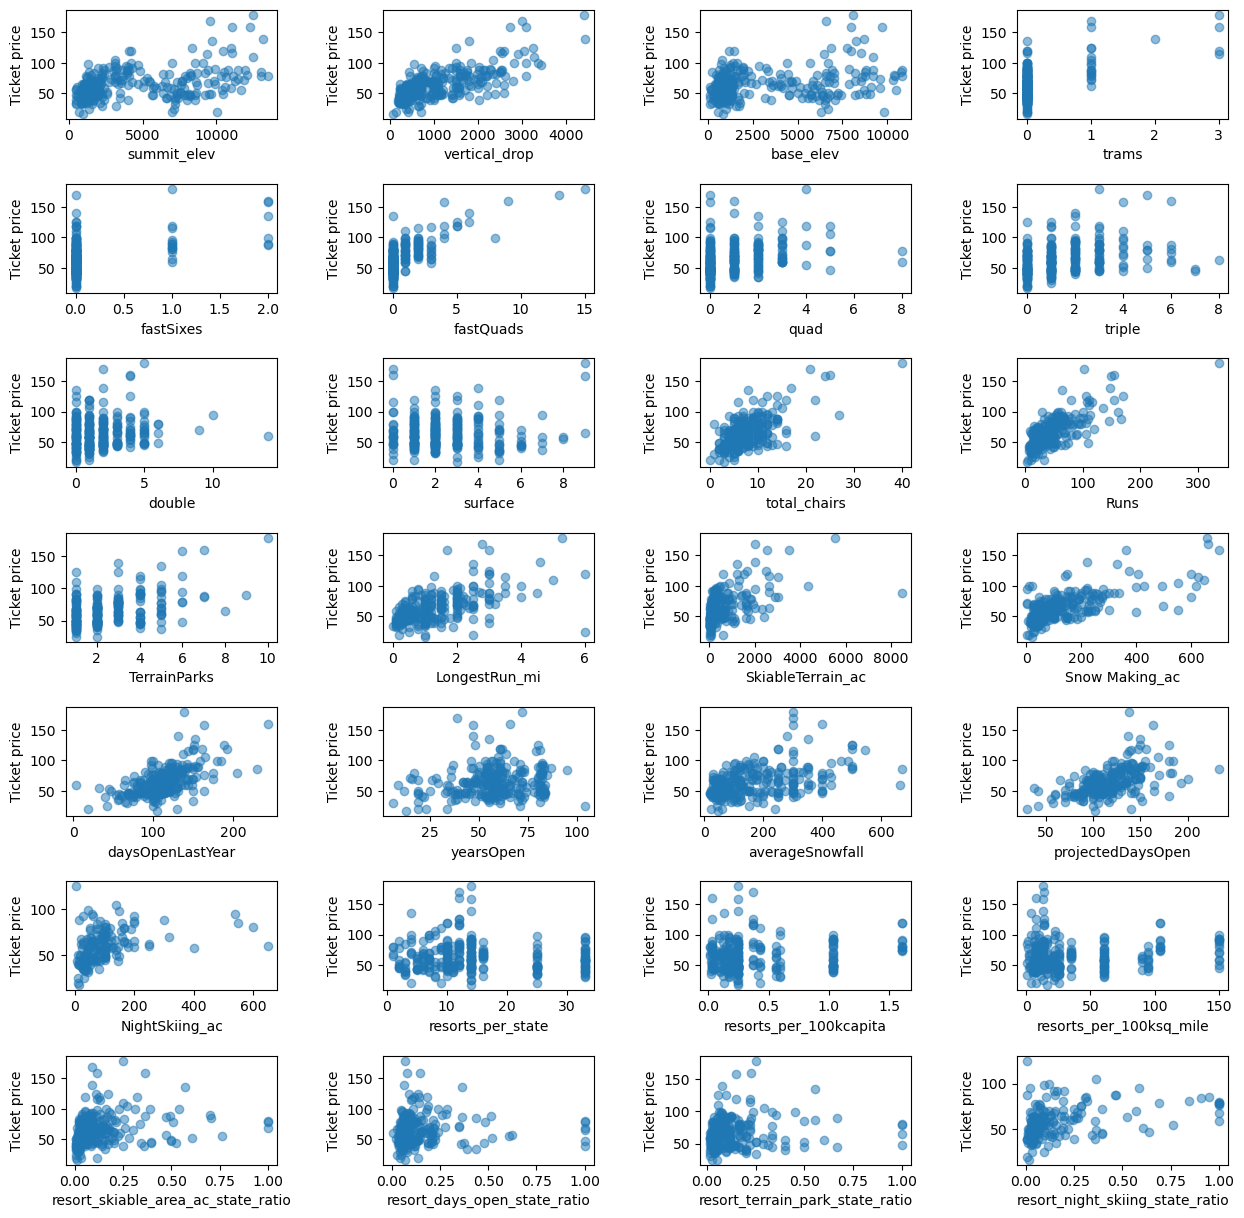

In [302]:
scatterplots(features, ncol=4, figsize=(15, 15))

In [304]:
ski_data['total_chairs_runs_ratio'] = ski_data['total_chairs'] / ski_data['Runs']
ski_data['total_chairs_skiable_ratio'] = ski_data['total_chairs'] / ski_data['SkiableTerrain_ac']
ski_data['fastQuads_runs_ratio'] = ski_data['fastQuads'] / ski_data['Runs']
ski_data['fastQuads_skiable_ratio'] = ski_data['fastQuads'] / ski_data['SkiableTerrain_ac']

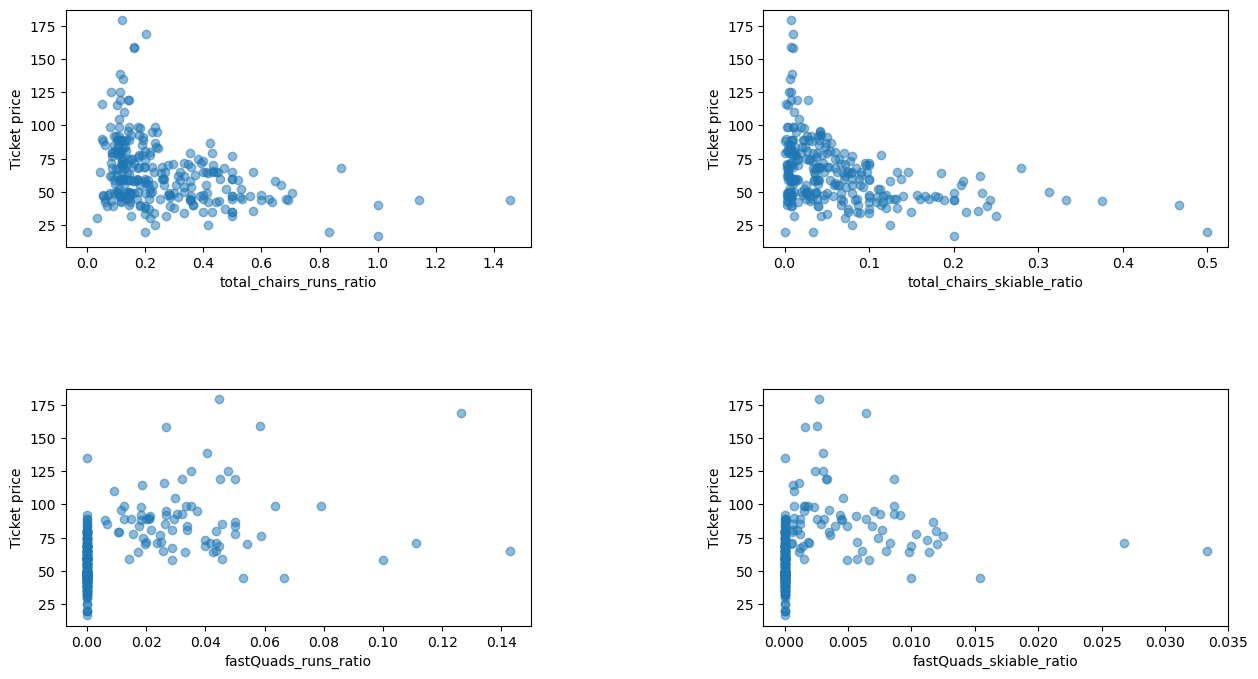

In [306]:
scatterplots(['total_chairs_runs_ratio', 'total_chairs_skiable_ratio', 'fastQuads_runs_ratio', 'fastQuads_skiable_ratio'], ncol=2)

In [308]:
ski_data.head().transpose()

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [310]:
ski_data.to_csv('ski_data_step3_features.csv', index=False)